In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.8.2
Running on TPU  ['10.59.166.122:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.59.166.122:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.59.166.122:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH: str = "/content/drive/My Drive/skripsi/preprocessed_newerer/"
DATA_TUNER: str = "/content/drive/My Drive/skripsi/tuner/"
DATA_WEIGHT: str = "/content/drive/My Drive/skripsi/weight/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

datatrain = pd.read_csv(f'{DATA_PATH}data_train9010.csv')
dataval = pd.read_csv(f'{DATA_PATH}data_val9010.csv')
datatest = pd.read_csv(f'{DATA_PATH}data_test9010.csv')

data_train = datatrain['tweets']
data_val = dataval['tweets']
data_test = datatest['tweets']

y_train = datatrain['label']
y_val = dataval['label']
y_test = datatest['label']

In [ ]:
x = datatrain["tweets"].str.split("\\s+")

In [ ]:
max_length = x.str.len().max()
max_length

48

In [ ]:
print(data_train)

0       presiden joko widodo jokowi tinjau vaksinasi m...
1       ini jelas untuk anda yang sudah di vaksin tapi...
2       masalah benar bukan pada vaksinasi lain bagaim...
3                   ayo vaksin dan terap prokes dengan 5m
4          astrazeneca masalah tetap pakai oleh australia
                              ...                        
2146    vaksinasi covid 19 dosis 1 untuk nakes lansia ...
2147                        mama juga tidak berani vaksin
2148    sementara untuk lansia terima vaksin dosis per...
2149    orang guru di jombang berontak tidak mau sunti...
2150    perintah terus upaya untuk kembang dan laku ad...
Name: tweets, Length: 2151, dtype: object


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import BertTokenizer, TFBertModel

bert_tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-large-p1",
                                               padding_side='right')
bert_model = TFBertModel.from_pretrained("indobenchmark/indobert-large-p1",
                                         output_hidden_states=True)

Some layers from the model checkpoint at indobenchmark/indobert-large-p1 were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at indobenchmark/indobert-large-p1.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
def BERT(tweets):
  vector = bert_model(tweets)
  return vector

In [ ]:
token_train = bert_tokenizer(list(data_train), padding='max_length', max_length=max_length, return_tensors='tf',truncation=True)
token_val = bert_tokenizer(list(data_val), padding='max_length', max_length=max_length, return_tensors='tf',truncation=True)
token_test = bert_tokenizer(list(data_test), padding='max_length', max_length=max_length, return_tensors='tf',truncation=True)

In [ ]:
len(max(data_train, key=len))

281

In [ ]:
model_train = BERT(token_train)
model_val = BERT(token_val)
model_test = BERT(token_test)

In [ ]:
features_train = model_train[0][:,0,:].numpy()
features_val = model_val[0][:,0,:].numpy()
features_test = model_test[0][:,0,:].numpy()

In [ ]:
features_train

array([[-0.4350667 , -1.273426  , -0.898422  , ..., -1.0775979 ,
         0.42274976,  1.5482839 ],
       [-0.30216938,  0.35711035,  0.29636976, ..., -0.40925738,
         0.08504701,  0.07983024],
       [-0.38426453,  0.28867266, -1.0103543 , ..., -0.9281738 ,
         1.0634325 ,  0.41632196],
       ...,
       [-0.502687  , -1.0896932 , -0.1804666 , ..., -1.1075023 ,
         0.03576082,  0.6788263 ],
       [-0.19886273, -0.7822783 ,  0.26905808, ..., -1.56372   ,
         0.3089442 ,  1.2542944 ],
       [ 0.41064978,  0.12680872, -1.0102212 , ..., -1.0896696 ,
         0.6687543 , -1.0804602 ]], dtype=float32)

In [ ]:
features_train.shape

(2151, 1024)

In [ ]:
import numpy as np

In [ ]:
x_train = np.reshape(features_train, features_train.shape + (1,))
x_val = np.reshape(features_val, features_val.shape + (1,))
x_test = np.reshape(features_test, features_test.shape + (1,))

In [ ]:
x_train.shape

(2151, 1024, 1)

In [ ]:
x_train1 = np.concatenate((x_train,x_val))
x_train1.shape

(2581, 1024, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(datatrain['label'])
y_val = to_categorical(dataval['label'])
y_test = to_categorical(datatest['label'])
print(y_train)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
y_train1 = np.concatenate((y_train,y_val))

In [ ]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((2151, 1024, 1),
 (430, 1024, 1),
 (287, 1024, 1),
 (2151, 5),
 (430, 5),
 (287, 5))

In [ ]:
def eval_model(x, y, model):
    loss, accuracy = model.evaluate(x, y, verbose=False)
    return loss, accuracy

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import kerastuner as kt
from kerastuner.tuners import Hyperband
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras import regularizers

In [ ]:
def BERT_CNN(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Choice('conv_filters', values=[32, 64, 128,256]), 
                   kernel_size=hp.Choice('kernel_size', values=[2,3,4]), 
                   activation='relu'))
    model.add(MaxPooling1D(pool_size=hp.Choice('pool_size', values=[2,3,4])))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(units=hp.Choice('dense_units', values = [32, 64, 128,256]), 
                  activation='relu'))
    model.add(Dense(5, activation='softmax')) 

    adam = tf.optimizers.Adam(hp.Choice('learning_rate',
                                        values=[1e-3, 1e-4, 5e-5, 1e-5]))
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', 
                  metrics=['accuracy'])          
    
    return model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Activation, Dropout
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, Flatten

In [ ]:
tuner = Hyperband(
    BERT_CNN,
    max_epochs=100,
    objective='val_accuracy',
    directory=DATA_TUNER,
    project_name='testnewerer_bert_cnn_001'
)

INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/skripsi/tuner/testnewerer_bert_cnn_001/oracle.json


INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/skripsi/tuner/testnewerer_bert_cnn_001/oracle.json


INFO:tensorflow:Reloading Tuner from /content/drive/My Drive/skripsi/tuner/testnewerer_bert_cnn_001/tuner0.json


INFO:tensorflow:Reloading Tuner from /content/drive/My Drive/skripsi/tuner/testnewerer_bert_cnn_001/tuner0.json


In [ ]:
tuner.search(x_train, y_train, epochs=100, validation_data=(x_val, y_val))

Trial 254 Complete [00h 02m 00s]
val_accuracy: 0.6674418449401855

Best val_accuracy So Far: 0.6744186282157898
Total elapsed time: 01h 24m 03s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'conv_filters': 32,
 'dense_units': 32,
 'kernel_size': 3,
 'learning_rate': 0.0001,
 'pool_size': 2,
 'tuner/bracket': 1,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/round': 1,
 'tuner/trial_id': '0239'}

In [ ]:
tuner.results_summary()

Results summary
Results in /content/drive/My Drive/skripsi/tuner/testnewerer_bert_cnn_001
Showing 10 best trials
Trial summary
Hyperparameters:
conv_filters: 32
kernel_size: 3
pool_size: 2
dense_units: 32
learning_rate: 0.0001
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0239
Score: 0.6744186282157898
Trial summary
Hyperparameters:
conv_filters: 64
kernel_size: 4
pool_size: 4
dense_units: 256
learning_rate: 0.0001
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0205
Score: 0.6720930337905884
Trial summary
Hyperparameters:
conv_filters: 128
kernel_size: 4
pool_size: 4
dense_units: 256
learning_rate: 5e-05
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.669767439365387
Trial summary
Hyperparameters:
conv_filters: 32
kernel_size: 4
pool_size: 4
dense_units: 128
learning_rate: 5e-05
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.6674418

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model_cnn = BERT_CNN(best_hps)

In [ ]:
 es_callbacks = [EarlyStopping(monitor="val_loss", min_delta=0.001, patience=10)]
 
 
 history = model_cnn.fit(x_train,
           y_train,
           epochs=100,
           validation_data=(x_val, y_val),
           callbacks=[es_callbacks])

Epoch 1/100
68/68 [==============================] - 2s 19ms/step - loss: 1.5113 - accuracy: 0.3366 - val_loss: 1.4153 - val_accuracy: 0.4093
Epoch 2/100
68/68 [==============================] - 1s 15ms/step - loss: 1.3624 - accuracy: 0.4458 - val_loss: 1.3501 - val_accuracy: 0.4186
Epoch 3/100
68/68 [==============================] - 1s 16ms/step - loss: 1.2837 - accuracy: 0.4686 - val_loss: 1.2953 - val_accuracy: 0.4535
Epoch 4/100
68/68 [==============================] - 1s 20ms/step - loss: 1.2289 - accuracy: 0.4960 - val_loss: 1.2440 - val_accuracy: 0.4744
Epoch 5/100
68/68 [==============================] - 1s 18ms/step - loss: 1.1776 - accuracy: 0.5291 - val_loss: 1.2464 - val_accuracy: 0.4860
Epoch 6/100
68/68 [==============================] - 1s 19ms/step - loss: 1.1498 - accuracy: 0.5402 - val_loss: 1.1807 - val_accuracy: 0.5209
Epoch 7/100
68/68 [==============================] - 1s 18ms/step - loss: 1.1179 - accuracy: 0.5467 - val_loss: 1.1535 - val_accuracy: 0.5372
Epoch 

In [ ]:
import matplotlib.pyplot as plt

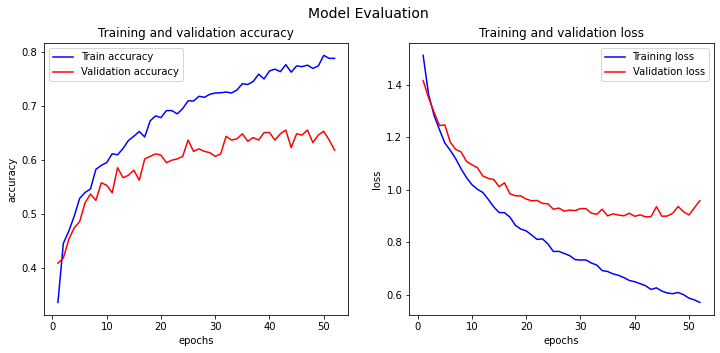

In [ ]:
 accuracy = history.history['accuracy']
 val_accuracy = history.history['val_accuracy']
 loss = history.history['loss']
 val_loss = history.history['val_loss']
 x = range(1, len(accuracy) + 1)

 plt.figure(figsize=(12, 5))
 plt.subplot(1, 2, 1)
 plt.plot(x, accuracy, 'b', label='Train accuracy')
 plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
 plt.title('Training and validation accuracy')
 plt.xlabel('epochs')
 plt.ylabel('accuracy')
 plt.legend()
 plt.subplot(1, 2, 2)
 plt.plot(x, loss, 'b', label='Training loss')
 plt.plot(x, val_loss, 'r', label='Validation loss')
 plt.title('Training and validation loss')
 plt.xlabel('epochs')
 plt.ylabel('loss')
 plt.legend()
 plt.suptitle('Model Evaluation', fontsize=14)
 plt.savefig('cnn_graph.png')

In [ ]:
es_callbacks = [EarlyStopping(monitor="val_loss", min_delta=0.001, patience=10)]
 
 
history = model_cnn.fit(x_train1,
          y_train1,
          epochs=100,
          validation_data=(x_test, y_test),
          callbacks=[es_callbacks])

Epoch 1/100
81/81 [==============================] - 1s 16ms/step - loss: 0.6371 - accuracy: 0.7671 - val_loss: 0.9762 - val_accuracy: 0.6132
Epoch 2/100
81/81 [==============================] - 1s 15ms/step - loss: 0.6213 - accuracy: 0.7691 - val_loss: 0.9741 - val_accuracy: 0.5993
Epoch 3/100
81/81 [==============================] - 1s 15ms/step - loss: 0.6109 - accuracy: 0.7726 - val_loss: 0.9610 - val_accuracy: 0.6098
Epoch 4/100
81/81 [==============================] - 1s 15ms/step - loss: 0.6287 - accuracy: 0.7582 - val_loss: 0.9938 - val_accuracy: 0.6098
Epoch 5/100
81/81 [==============================] - 1s 15ms/step - loss: 0.6063 - accuracy: 0.7726 - val_loss: 0.9653 - val_accuracy: 0.6237
Epoch 6/100
81/81 [==============================] - 1s 15ms/step - loss: 0.6009 - accuracy: 0.7745 - val_loss: 0.9585 - val_accuracy: 0.6202
Epoch 7/100
81/81 [==============================] - 1s 15ms/step - loss: 0.5932 - accuracy: 0.7815 - val_loss: 0.9652 - val_accuracy: 0.6202
Epoch 

In [ ]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1022, 32)          128       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 511, 32)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16352)             0         
                                                                 
 dropout_1 (Dropout)         (None, 16352)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                523296    
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                      

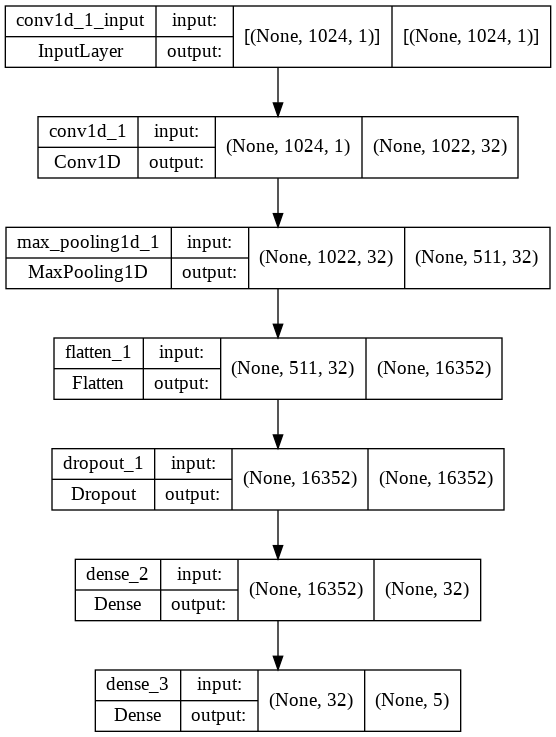

In [ ]:
plot_model(model_cnn, to_file='visualize_model.png', show_shapes=True, show_layer_names=True)

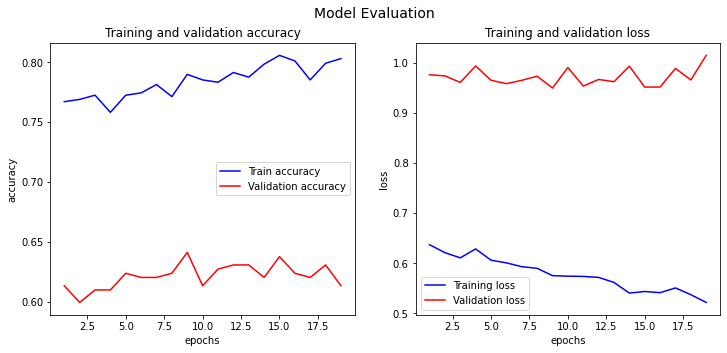

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, accuracy, 'b', label='Train accuracy')
plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.suptitle('Model Evaluation', fontsize=14)
plt.savefig('cnn_graph.png')

In [ ]:
loss_train_best, accuracy_train_best = eval_model(x_train1, y_train1, model_cnn)
loss_test_best, accuracy_test_best = eval_model(x_test,y_test, model_cnn)

In [ ]:
print('Train [{}][{}]'.format(accuracy_train_best, loss_train_best))
print('Test [{}][{}]'.format(accuracy_test_best, loss_test_best))

Train [0.8566446900367737][0.44396334886550903]
Test [0.6132404208183289][1.0150154829025269]


In [ ]:
result_classes = np.argmax(model_cnn.predict(x_test), axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
(unique, counts) = np.unique(result_classes, return_counts=True)
 
frequencies = np.asarray((unique, counts)).T
frequencies

array([[ 0, 33],
       [ 1, 36],
       [ 2, 45],
       [ 3, 96],
       [ 4, 77]])

In [ ]:
ground_truth = np.asarray(datatest['label'])

In [ ]:
print(classification_report(ground_truth, result_classes, digits = 4))

              precision    recall  f1-score   support

           0     0.6970    0.6389    0.6667        36
           1     0.6389    0.4694    0.5412        49
           2     0.4000    0.5294    0.4557        34
           3     0.5521    0.6883    0.6127        77
           4     0.7662    0.6484    0.7024        91

    accuracy                         0.6132       287
   macro avg     0.6108    0.5949    0.5957       287
weighted avg     0.6350    0.6132    0.6171       287



In [ ]:
import seaborn as sns
 
colormap = sns.color_palette('Blues')

In [ ]:
xtick = []
for i in range(len(result_classes)):
  if result_classes[i] == 0:
    xtick.append('negative')
  elif result_classes[i] == 1:
    xtick.append('weakly negative')
  elif result_classes[i] == 2:
    xtick.append('neutral')
  elif result_classes[i] == 3:
    xtick.append('weakly positive')
  else:
    xtick.append('positive')

In [ ]:
code = dict(zip(datatrain['label'].unique(), datatrain['label'].unique()))
code

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

In [ ]:
classes = list(code.values())
classes

[3, 2, 4, 1, 0]

In [ ]:
confusion_matrix(ground_truth, result_classes)

array([[23,  3,  7,  2,  1],
       [ 7, 23,  8,  9,  2],
       [ 0,  7, 18,  6,  3],
       [ 1,  2,  9, 53, 12],
       [ 2,  1,  3, 26, 59]])

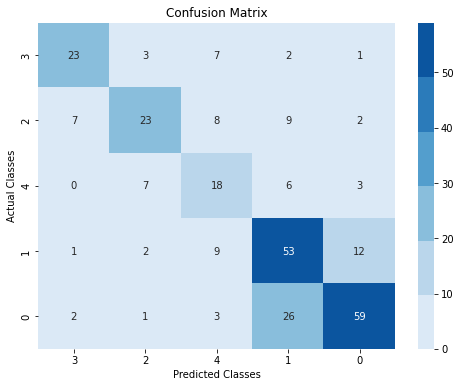

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(confusion_matrix(ground_truth, result_classes), annot = True, cmap=colormap, fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
ax.set(xlabel='Predicted Classes', ylabel='Actual Classes')
ax.figure.savefig('confusion_matrix.png')